#Representação do Jogo da Vida de Conway

---

Projeto desenvolvido na disciplina de Modelagem e Simulação que representa o funcionamento do [Jogo da Vida de Conway](https://pt.wikipedia.org/wiki/Jogo_da_vida). O Jogo da Vida de Conway é um modelo de evolução temporal conhecido como autômato celular desenvolvido por [John Conway](https://pt.wikipedia.org/wiki/John_Conway). O modelo representa com o uso de regras bem simples alterações e mudanças em grupos de seres vivos.

![Representação do jogo da vida em funcionamento](https://upload.wikimedia.org/wikipedia/commons/e/e5/Gospers_glider_gun.gif)

### Importando biblotecas

Para criar a representação será necessário utilizar bibliotecas, as bibliotecas utilizadas foram:


*   [Numpy](https://numpy.org/)
*   [Scipy](https://scipy.org/)
*   [Matplotlib](https://matplotlib.org/)


In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
from matplotlib import colors
from IPython.display import HTML

### Definição de funções

In [ ]:
def computa_automata(estado_atual, soma_vizinhos):
  if (estado_atual == 1):
    if(soma_vizinhos < 2):
      return 0
    else:
      if(soma_vizinhos > 3):
        return 0
      else:
        return 1
  else:
    if (soma_vizinhos == 3) :
      return 1
    else:
      return 0

In [ ]:
def joga_jogo(matriz_de_estados, dimensao):
  mascara = np.ones((3,3))
  mascara[1,1] = 0
  matriz_num_vizinhos = signal.convolve2d(matriz_de_estados, mascara,
                                            boundary='fill', mode='same')
  for ii in np.arange(dimensao[0]):
    for jj in np.arange(dimensao[1]):
      estado_atual = matriz_de_estados[ii,jj]
      soma_vizinhos = matriz_num_vizinhos[ii,jj]
      #soma_vizinhos = computacao_soma(matriz_de_estados, ii, jj, dimensao)
      matriz_de_estados[ii,jj] = computa_automata(estado_atual, soma_vizinhos)

  return(matriz_de_estados)


### Execução principal

Usando das funções definidas anteriormente que realizam as computações necessárias para o jogo ser executado, é criada uma animação do jogo aplicado a uma matriz com valores randômicos.

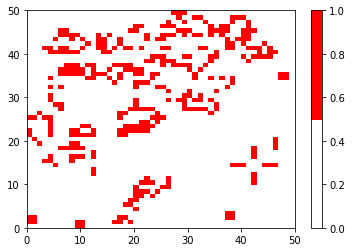

In [ ]:
dimensao = (50,50)
np.random.seed(45)
matriz_de_estados=np.random.randint(2,size=dimensao)

def generate_data():
    return matriz_de_estados

def update(matriz_de_estados):
    matriz_de_estados = joga_jogo(matriz_de_estados,dimensao)
    mat = ax.pcolormesh(matriz_de_estados, cmap=cmap)

def data_gen():
    while True:
        yield generate_data()

fig, ax = plt.subplots()
cmap = colors.ListedColormap(['white', 'red'])

mat = ax.pcolormesh(matriz_de_estados, cmap=cmap)
plt.colorbar(mat, cmap=cmap)
ani = animation.FuncAnimation(fig, update, data_gen, interval=200, save_count=100)

HTML(ani.to_html5_video())

## Autoria


---



Programa desenvolvido por Lisandra Melo (<mendie73@gmail.com>).

&copy; IMD/UFRN 2021-2022.